**Objective**: This demo examines epistemic uncertainty in an ensemble model (specifically, ensemble of 50 independent neural networks).

In [1]:
import sys; sys.path.insert(0, "..")
from src.models import NeuralNet
from src.utils import generate_data

In [2]:
from autograd import numpy as np
import matplotlib.pyplot as plt

In [3]:
activation_fn = lambda x: np.maximum(np.zeros(x.shape), x)

width = [50,20] # Use architecture used in paper
hidden_layers = len(width)
input_dim = 1
output_dim = 1

architecture = {
    'width': width,
    'hidden_layers': hidden_layers,
    'input_dim': input_dim,
    'output_dim': output_dim,
    'activation_fn_type': 'relu',
    'activation_fn_params': 'rate=1',
    'activation_fn': activation_fn,
}

params = {
    'step_size': 1e-3,
    'max_iteration': 3000,
    'random_restarts': 1,
}

reg_param = 0. # No regularization

def fit_nn(architecture, random, x, y, params, reg_param):
    nn = NeuralNet(architecture, random=random)
    nn.fit(x.reshape((1, -1)), y.reshape((1, -1)), params, reg_param=0)
    return nn

In [4]:
# Train neural networks with bootstraps of the training data
np.random.seed(207) # For reproducibility
nn_list = []
n_models = 50
for i in range(n_models):
    print("\n======== Model {:} / {:} ========\n".format(i+1, n_models))
    x, y, _ = generate_data(number_of_points=50, noise_variance=9)
    rand_state = np.random.randint(0, 100000)
    random = np.random.RandomState(rand_state)
    nn = fit_nn(architecture, random, x, y, params, reg_param)
    nn_list.append(nn)


======== Model 1 / 50 ========

Iteration 0 lower bound 7852.390594701113; gradient mag: 10582.182192062206
Iteration 100 lower bound 726.9255875702714; gradient mag: 2664.247577055402
Iteration 200 lower bound 143.89492407926036; gradient mag: 301.8550122954007
Iteration 300 lower bound 124.56353450163724; gradient mag: 79.20115563889115
Iteration 400 lower bound 113.93553067717664; gradient mag: 76.35334879450184
Iteration 500 lower bound 102.25040251293143; gradient mag: 74.63670353784727
Iteration 600 lower bound 90.87850884275127; gradient mag: 69.76759266871993
Iteration 700 lower bound 80.00004417803885; gradient mag: 67.69762027959415
Iteration 800 lower bound 69.04982617003402; gradient mag: 64.85868090586916
Iteration 900 lower bound 58.89753387797742; gradient mag: 56.782320381936856
Iteration 1000 lower bound 50.58000982405579; gradient mag: 48.62948872669675
Iteration 1100 lower bound 43.53360091853144; gradient mag: 44.41889495644254
Iteration 1200 lower bound 37.4076125

Iteration 1300 lower bound 9.58397519200268; gradient mag: 6.0579270202718885
Iteration 1400 lower bound 9.162532802225247; gradient mag: 6.452979559148224
Iteration 1500 lower bound 8.910002044165623; gradient mag: 3.7913911302986425
Iteration 1600 lower bound 8.733472768657697; gradient mag: 3.856817788578312
Iteration 1700 lower bound 8.619649620368499; gradient mag: 3.0507491081868525
Iteration 1800 lower bound 8.450657264856925; gradient mag: 7.346584453858903
Iteration 1900 lower bound 8.335102734367165; gradient mag: 5.166387884780853
Iteration 2000 lower bound 8.260225657139182; gradient mag: 5.23566393846595
Iteration 2100 lower bound 8.221940401045908; gradient mag: 4.25204146593509
Iteration 2200 lower bound 8.191609633920748; gradient mag: 5.74338306766287
Iteration 2300 lower bound 8.166848624735854; gradient mag: 5.550229429584369
Iteration 2400 lower bound 8.145406663617512; gradient mag: 3.1062893072897553
Iteration 2500 lower bound 8.125930542223065; gradient mag: 2.44

Iteration 2700 lower bound 10.898851055196623; gradient mag: 1.0620451357332705
Iteration 2800 lower bound 10.846620861661028; gradient mag: 1.116242046662698
Iteration 2900 lower bound 10.801530464858223; gradient mag: 1.1675548510759794

======== Model 8 / 50 ========

Iteration 0 lower bound 4726.427875062523; gradient mag: 8610.388312175535
Iteration 100 lower bound 446.09961679979125; gradient mag: 1895.154287754304
Iteration 200 lower bound 102.93767862577388; gradient mag: 246.8034522664813
Iteration 300 lower bound 87.65020339751996; gradient mag: 82.8305992971527
Iteration 400 lower bound 76.39365451130797; gradient mag: 63.48368408896238
Iteration 500 lower bound 66.32187955285012; gradient mag: 54.19471563435062
Iteration 600 lower bound 57.01866936590787; gradient mag: 54.956511890172976
Iteration 700 lower bound 39.32095631034427; gradient mag: 53.96068077618873
Iteration 800 lower bound 29.05432330749461; gradient mag: 48.86964912401581
Iteration 900 lower bound 22.191166

Iteration 1100 lower bound 45.30948657987604; gradient mag: 35.942238608688484
Iteration 1200 lower bound 37.96802331016095; gradient mag: 32.6994941438237
Iteration 1300 lower bound 31.57780907276432; gradient mag: 29.149820647527708
Iteration 1400 lower bound 25.67834567392603; gradient mag: 26.055097985827796
Iteration 1500 lower bound 21.068052729914275; gradient mag: 22.29361636777639
Iteration 1600 lower bound 17.709171358460807; gradient mag: 15.939481388091465
Iteration 1700 lower bound 15.891709732762711; gradient mag: 12.415760088484335
Iteration 1800 lower bound 14.667102374887747; gradient mag: 13.771082266454234
Iteration 1900 lower bound 12.170740531511543; gradient mag: 21.59985134594294
Iteration 2000 lower bound 10.864803017087027; gradient mag: 10.167130391614831
Iteration 2100 lower bound 10.393558934653658; gradient mag: 4.141899815452206
Iteration 2200 lower bound 10.145858008535404; gradient mag: 4.3616809131578735
Iteration 2300 lower bound 9.944507880177817; gra

Iteration 2500 lower bound 8.472809530448774; gradient mag: 2.760502873764095
Iteration 2600 lower bound 8.403053549079; gradient mag: 2.100714038475315
Iteration 2700 lower bound 8.337424064769417; gradient mag: 2.242114773988675
Iteration 2800 lower bound 8.25867505464939; gradient mag: 1.8180213673795305
Iteration 2900 lower bound 8.184692660064727; gradient mag: 1.9281689031375708

======== Model 15 / 50 ========

Iteration 0 lower bound 2543.1285748397313; gradient mag: 4877.485205204774
Iteration 100 lower bound 205.13917538120518; gradient mag: 366.9718439953023
Iteration 200 lower bound 167.99924152702263; gradient mag: 84.17914859492787
Iteration 300 lower bound 151.26572027572135; gradient mag: 67.70834245937802
Iteration 400 lower bound 134.19060389227838; gradient mag: 64.91866397875206
Iteration 500 lower bound 115.64593663568614; gradient mag: 62.42037794416397
Iteration 600 lower bound 96.3613572918711; gradient mag: 59.34261416785501
Iteration 700 lower bound 77.4200692

Iteration 800 lower bound 40.446250688290974; gradient mag: 33.93003014212184
Iteration 900 lower bound 35.65180385620687; gradient mag: 30.93539431011864
Iteration 1000 lower bound 31.59624049215431; gradient mag: 28.355251576448936
Iteration 1100 lower bound 28.07523060261632; gradient mag: 25.83474621435145
Iteration 1200 lower bound 24.903135356484253; gradient mag: 23.482092471753976
Iteration 1300 lower bound 22.219947627866137; gradient mag: 21.064671477908462
Iteration 1400 lower bound 19.96104086331184; gradient mag: 18.753838878652196
Iteration 1500 lower bound 18.016314131703734; gradient mag: 16.486790208941184
Iteration 1600 lower bound 16.515346784447296; gradient mag: 13.92211255326682
Iteration 1700 lower bound 15.283074048668817; gradient mag: 12.22033647235117
Iteration 1800 lower bound 14.22834021284249; gradient mag: 11.474622773896554
Iteration 1900 lower bound 13.343378604451567; gradient mag: 9.602222841452573
Iteration 2000 lower bound 12.577102325076106; gradie

Iteration 2200 lower bound 11.700422531512768; gradient mag: 4.350830323512418
Iteration 2300 lower bound 11.426359368340563; gradient mag: 4.5262146249958635
Iteration 2400 lower bound 11.125505056737389; gradient mag: 3.622980326275907
Iteration 2500 lower bound 10.719415051359354; gradient mag: 3.9784724805739207
Iteration 2600 lower bound 10.393703632458484; gradient mag: 3.8463752305425474
Iteration 2700 lower bound 10.091224209546022; gradient mag: 4.431653185859772
Iteration 2800 lower bound 9.83452109412863; gradient mag: 4.965207425908186
Iteration 2900 lower bound 9.5923131999388; gradient mag: 6.381690169538793

======== Model 22 / 50 ========

Iteration 0 lower bound 5049.481687767114; gradient mag: 9652.466657247067
Iteration 100 lower bound 347.4400825805485; gradient mag: 2239.5704940184537
Iteration 200 lower bound 79.5054727535015; gradient mag: 96.84499324915345
Iteration 300 lower bound 60.64666032028873; gradient mag: 65.81915915914878
Iteration 400 lower bound 48.1

Iteration 500 lower bound 50.5554808127242; gradient mag: 60.67470031540005
Iteration 600 lower bound 40.08897871113606; gradient mag: 50.42244184706225
Iteration 700 lower bound 32.348492365039135; gradient mag: 40.929768720330735
Iteration 800 lower bound 27.000536426003826; gradient mag: 34.4068990450884
Iteration 900 lower bound 23.252177019160204; gradient mag: 29.108187368319804
Iteration 1000 lower bound 20.315054849277328; gradient mag: 25.612386063366806
Iteration 1100 lower bound 18.178944554655832; gradient mag: 21.71809905544221
Iteration 1200 lower bound 16.51719528938179; gradient mag: 19.163821221113942
Iteration 1300 lower bound 15.252389426927918; gradient mag: 16.16877459381235
Iteration 1400 lower bound 14.385145962494798; gradient mag: 13.582978830497387
Iteration 1500 lower bound 13.643418325572016; gradient mag: 12.10530221054851
Iteration 1600 lower bound 13.149000915181743; gradient mag: 9.338075899331562
Iteration 1700 lower bound 12.778839753942526; gradient m

Iteration 1900 lower bound 54.117428922969594; gradient mag: 42.88265973955584
Iteration 2000 lower bound 49.22612025697298; gradient mag: 41.807383264799
Iteration 2100 lower bound 44.46645112679471; gradient mag: 40.454676825334204
Iteration 2200 lower bound 39.90009983839772; gradient mag: 38.778211571059565
Iteration 2300 lower bound 35.59892198340808; gradient mag: 36.7388073690627
Iteration 2400 lower bound 31.631132177269528; gradient mag: 34.176447711109425
Iteration 2500 lower bound 28.053928312219533; gradient mag: 31.56463242610702
Iteration 2600 lower bound 24.905176573290944; gradient mag: 28.33086840231113
Iteration 2700 lower bound 22.233840248343704; gradient mag: 25.083766377376026
Iteration 2800 lower bound 20.038720575681804; gradient mag: 22.08939277572124
Iteration 2900 lower bound 18.330867223613875; gradient mag: 18.736809280516418

======== Model 29 / 50 ========

Iteration 0 lower bound 562.0375290792398; gradient mag: 2242.131073547426
Iteration 100 lower boun

Iteration 200 lower bound 139.7371493254562; gradient mag: 74.4999480590337
Iteration 300 lower bound 120.71398997316577; gradient mag: 56.767785409974216
Iteration 400 lower bound 100.88049750722655; gradient mag: 55.893014897324214
Iteration 500 lower bound 77.07111862668519; gradient mag: 58.61868022481067
Iteration 600 lower bound 48.77777477909395; gradient mag: 61.08998254383229
Iteration 700 lower bound 31.47004718276446; gradient mag: 36.964957295965995
Iteration 800 lower bound 22.870896247792334; gradient mag: 23.343327639424274
Iteration 900 lower bound 19.171940008438742; gradient mag: 14.84915074616908
Iteration 1000 lower bound 16.78080475541367; gradient mag: 12.656256985972805
Iteration 1100 lower bound 15.293964912581883; gradient mag: 12.66567772731051
Iteration 1200 lower bound 13.929783685279354; gradient mag: 11.93039433453734
Iteration 1300 lower bound 13.027202959708966; gradient mag: 8.189770441745345
Iteration 1400 lower bound 12.433241257084862; gradient mag: 

Iteration 1600 lower bound 8.856896904920308; gradient mag: 1.5601557591917141
Iteration 1700 lower bound 8.71502564783327; gradient mag: 1.4458826951098827
Iteration 1800 lower bound 8.60576899651874; gradient mag: 1.1732481383929374
Iteration 1900 lower bound 8.52387103635489; gradient mag: 1.1339864838389369
Iteration 2000 lower bound 8.4640704264291; gradient mag: 1.0725179894078145
Iteration 2100 lower bound 8.422037634218771; gradient mag: 0.7394791833953462
Iteration 2200 lower bound 8.393542845060715; gradient mag: 0.5295930639379876
Iteration 2300 lower bound 8.31918375427603; gradient mag: 1.4260403263219072
Iteration 2400 lower bound 8.301575378719226; gradient mag: 1.787327994907196
Iteration 2500 lower bound 8.289975492056827; gradient mag: 1.4298168836164997
Iteration 2600 lower bound 8.282128593945757; gradient mag: 2.8612590581754604
Iteration 2700 lower bound 8.276174822965078; gradient mag: 0.9988134182386308
Iteration 2800 lower bound 8.270900843542876; gradient mag:


======== Model 39 / 50 ========

Iteration 0 lower bound 12398.773255787795; gradient mag: 15027.43613243222
Iteration 100 lower bound 1867.7726073180374; gradient mag: 4584.653583606259
Iteration 200 lower bound 330.4629641108257; gradient mag: 1504.3965133272757
Iteration 300 lower bound 133.78494619278771; gradient mag: 404.354150873472
Iteration 400 lower bound 113.60039513072843; gradient mag: 132.3428714031783
Iteration 500 lower bound 105.54737261117037; gradient mag: 97.12670651777921
Iteration 600 lower bound 97.12200159576261; gradient mag: 110.24631023075361
Iteration 700 lower bound 85.4706425022244; gradient mag: 134.4843583219866
Iteration 800 lower bound 73.5284100336978; gradient mag: 66.76119653091409
Iteration 900 lower bound 69.18815531552056; gradient mag: 49.91704915066034
Iteration 1000 lower bound 65.0851532585495; gradient mag: 47.81344777160249
Iteration 1100 lower bound 61.002815918483286; gradient mag: 45.68797431264999
Iteration 1200 lower bound 56.93674281

Iteration 1400 lower bound 28.036126452527938; gradient mag: 33.21293639384947
Iteration 1500 lower bound 25.381108056830826; gradient mag: 31.565908746943062
Iteration 1600 lower bound 22.88972647128459; gradient mag: 29.751845544006155
Iteration 1700 lower bound 20.583191483389037; gradient mag: 27.860830426884093
Iteration 1800 lower bound 18.482014580117607; gradient mag: 25.79223475765115
Iteration 1900 lower bound 16.604045476277022; gradient mag: 23.722211472106657
Iteration 2000 lower bound 14.962173988694344; gradient mag: 21.55099986703338
Iteration 2100 lower bound 13.561173598351; gradient mag: 19.305841755348048
Iteration 2200 lower bound 12.39710240414728; gradient mag: 17.106821025982565
Iteration 2300 lower bound 11.457646795281244; gradient mag: 14.956784832873348
Iteration 2400 lower bound 10.722304268524862; gradient mag: 12.776663543033221
Iteration 2500 lower bound 10.162001948268351; gradient mag: 10.779457910953646
Iteration 2600 lower bound 9.74826594636753; gra

Iteration 2700 lower bound 10.854930650996387; gradient mag: 2.052842673112446
Iteration 2800 lower bound 10.752903113031122; gradient mag: 1.9783075868053799
Iteration 2900 lower bound 10.647339962046853; gradient mag: 2.006866876804764

======== Model 46 / 50 ========

Iteration 0 lower bound 15686.280355601071; gradient mag: 19427.901578009263
Iteration 100 lower bound 3031.448182489519; gradient mag: 7621.394745823685
Iteration 200 lower bound 690.0819806407724; gradient mag: 2760.5501297228825
Iteration 300 lower bound 183.860578284695; gradient mag: 1053.4796335242618
Iteration 400 lower bound 89.34808391172339; gradient mag: 360.74438019987423
Iteration 500 lower bound 65.74108163110076; gradient mag: 174.3228412674923
Iteration 600 lower bound 56.04978073557033; gradient mag: 84.57563833505554
Iteration 700 lower bound 51.734509799260984; gradient mag: 56.577310070114954
Iteration 800 lower bound 48.95042641818577; gradient mag: 49.31201029005626
Iteration 900 lower bound 46.82

Iteration 1100 lower bound 9.915578886278974; gradient mag: 3.121843348651569
Iteration 1200 lower bound 9.459011824624284; gradient mag: 3.619586852171672
Iteration 1300 lower bound 9.256652513805927; gradient mag: 2.736790649033555
Iteration 1400 lower bound 9.131786740671675; gradient mag: 2.839812901548023
Iteration 1500 lower bound 9.029440846140512; gradient mag: 2.526956248329445
Iteration 1600 lower bound 8.948403618656352; gradient mag: 2.5236542053967175
Iteration 1700 lower bound 8.882629240176716; gradient mag: 2.248066789272243
Iteration 1800 lower bound 8.827429147061965; gradient mag: 3.5382696548824537
Iteration 1900 lower bound 8.780294486379203; gradient mag: 3.385713252549712
Iteration 2000 lower bound 8.73897816881081; gradient mag: 2.844142343776046
Iteration 2100 lower bound 8.704436884599389; gradient mag: 2.1140329199144747
Iteration 2200 lower bound 8.674749473389591; gradient mag: 2.830449702724636
Iteration 2300 lower bound 8.650591887111679; gradient mag: 2.

In [5]:
# Generate test data
_, _, x_test = generate_data(number_of_points=50, noise_variance=9)

In [6]:
# Make predictions with the ensemble
y_pred = [nn.forward(nn.weights, x_test.reshape(1,-1)) for nn in nn_list]
y_pred = np.concatenate([y.reshape(1,-1) for y in y_pred])
y_pred_mean = np.mean(y_pred, axis=0)

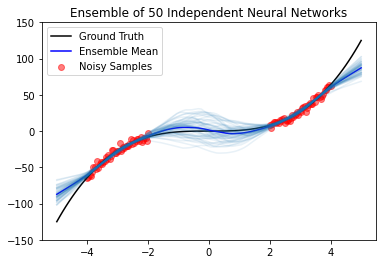

In [10]:
# Visualize ensemble predictions
plt.scatter(x,y, color='red', alpha = 0.5, label="Noisy Samples")
plt.plot(x_test, x_test**3, color='black', label="Ground Truth")
plt.plot(x_test, y_pred_mean, color='blue', label="Ensemble Mean")
plt.plot(x_test, y_pred.T, color='tab:blue', alpha=0.1)
plt.ylim([-150, 150])
plt.title("Ensemble of 50 Independent Neural Networks")
plt.legend()
plt.show()